In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [5]:
dataset_dir = (r"C:\Users\nisha\OneDrive\Desktop\jupyter notebook projects\caltech-101")
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


In [10]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [11]:
# a. loada a pre-trained CNN model on a large dataset
weights_path = (r"C:\Users\nisha\OneDrive\Desktop\jupyter notebook projects\dataset\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

In [9]:
#b. Freeze parameter in model lower convoultional layer
for layer in base_model.layers:
   layer.trainable = False

In [16]:
#c. add custom classifier with several layers of trainable paramneter to model
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
#d. train classifier on training data availble for task
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.0782 - loss: 4.5483 - val_accuracy: 0.0770 - val_loss: 4.2751
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.1108 - loss: 4.1201 - val_accuracy: 0.1655 - val_loss: 4.0503
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.1548 - loss: 4.0350 - val_accuracy: 0.1930 - val_loss: 3.9561
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.2318 - loss: 3.7297 - val_accuracy: 0.2180 - val_loss: 3.9263
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.2347 - loss: 3.7316 - val_accuracy: 0.2165 - val_loss: 3.9318
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.2350 - loss: 3.5219 - val_accuracy: 0.1980 - val_loss: 3.7556
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.2398 - loss: 3.4969 - val_accuracy: 0.2595 - val_loss: 3.4710
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.2999 - loss: 3.1671 - val_accuracy: 0.2580 - val_loss:

In [18]:
# E. fine-tune hyper paramneter and unfreeze more layers as needed
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 967ms/step - accuracy: 0.2423 - loss: 3.7220 - val_accuracy: 0.4895 - val_loss: 2.3658
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 969ms/step - accuracy: 0.5493 - loss: 1.9048 - val_accuracy: 0.5290 - val_loss: 2.0308
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 966ms/step - accuracy: 0.6811 - loss: 1.2485 - val_accuracy: 0.5610 - val_loss: 1.9088
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 950ms/step - accuracy: 0.7907 - loss: 0.8016 - val_accuracy: 0.5915 - val_loss: 1.7837
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 967ms/step - accuracy: 0.8663 - loss: 0.4581 - val_accuracy: 0.5910 - val_loss: 1.8266
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 946ms/step - accuracy: 0.9228 - loss: 0.2979 - val_accuracy: 0.6190 - val_loss: 1.8256
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 944ms/step - accuracy: 0.9562 - loss: 0.1606 - val_accuracy: 0.6150 - val_loss: 1.8840
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 948ms/step - accuracy: 0.9676 - loss: 0.1362 - val_accu

In [19]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step


In [20]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  Faces_easy
Actual:  Faces_easy


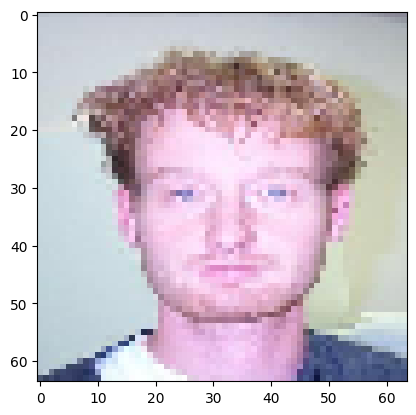

In [25]:
n = 1010
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])